In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("synthetic_covid19_data.csv")

# 1. Display the first few rows
print("First 5 rows:")
print(df.head())


First 5 rows:
         date      continent location  total_cases  new_cases  total_deaths  \
0  2021-11-19           Asia    India      6423388       2490        107051   
1  2021-09-12  North America   Russia      6550634       6980        481184   
2  2020-04-20         Europe   Canada      4304572       9134         15116   
3  2022-10-16           Asia  Germany      2234489       7661         20045   
4  2021-05-15         Europe      USA      9958614       1724        419543   

   new_deaths  total_tests  new_tests  positive_rate  ...  stringency_index  \
0         323     60016385       7386       0.904377  ...         69.259331   
1         697     28666409       6862       0.525850  ...          7.185287   
2         325     80352550      40108       0.791575  ...         14.823246   
3         624     89212990      91788       0.115291  ...         70.007502   
4         824      5364240      75023       0.927643  ...         28.972334   

   population  population_density  m

In [7]:
# 2. Clean the data: handle missing values & keep relevant columns
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'population', 'continent']]
df.dropna(subset=['total_cases', 'total_deaths', 'continent'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

/tmp/ipython-input-7-2259963549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['total_cases', 'total_deaths', 'continent'], inplace=True)
/tmp/ipython-input-7-2259963549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


/tmp/ipython-input-6-136574758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=latest_data.index, y=latest_data['total_cases'], palette='Oranges_r')


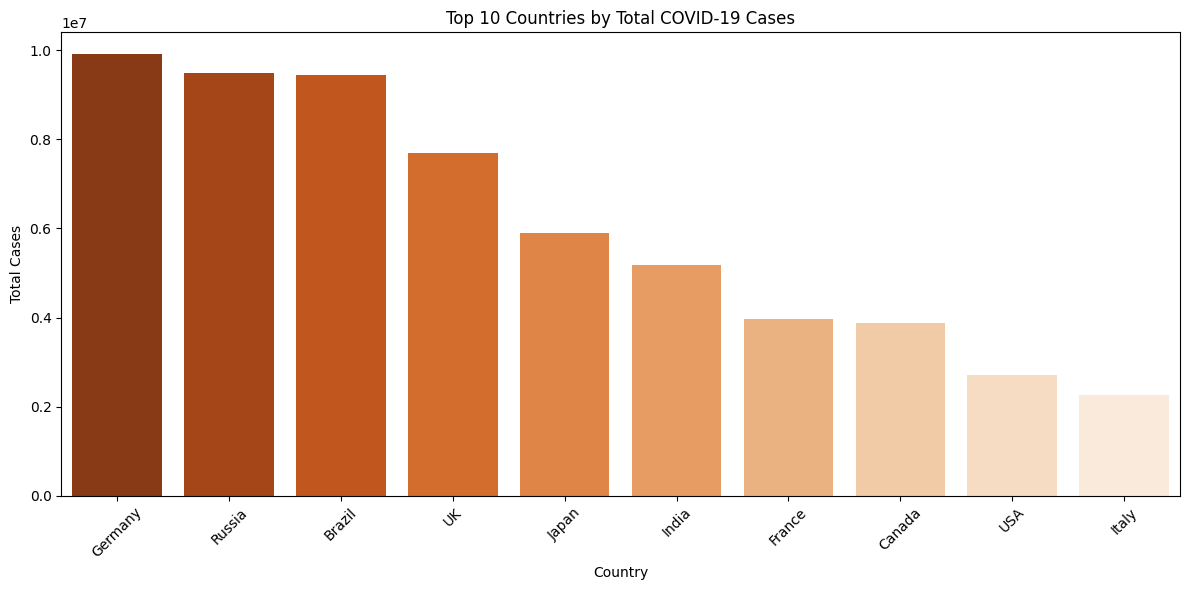

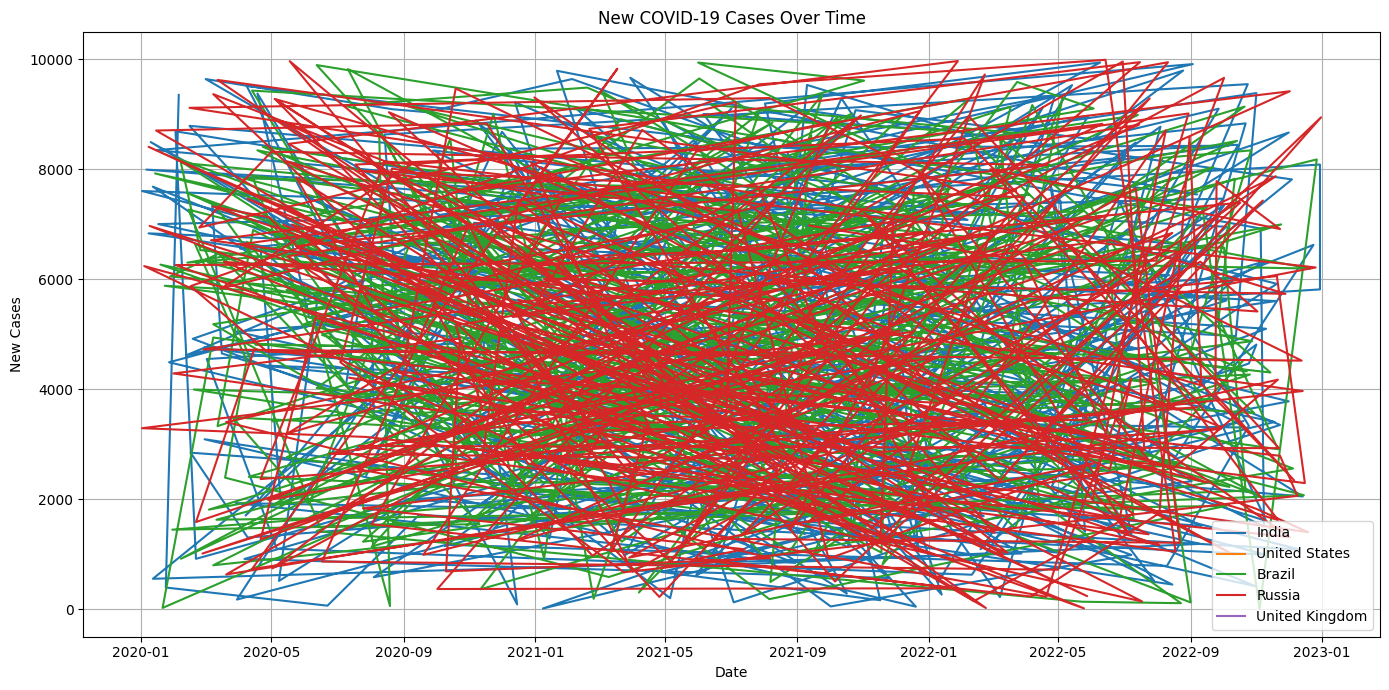

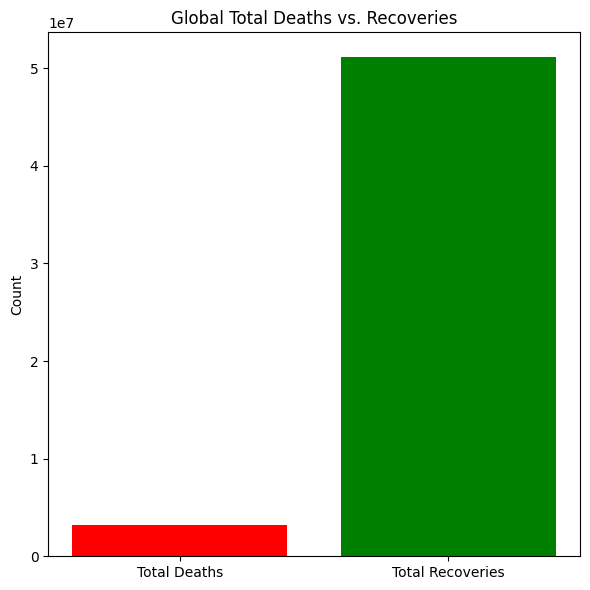

In [6]:
# 3a. Top 10 countries by total cases
latest_data = df.sort_values('date').groupby('location').last().sort_values(by='total_cases', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=latest_data.index, y=latest_data['total_cases'], palette='Oranges_r')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.ylabel("Total Cases")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3b. New cases trend over time for selected countries
selected_countries = ['India', 'United States', 'Brazil', 'Russia', 'United Kingdom']
plt.figure(figsize=(14,7))
for country in selected_countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title("New COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3c. Bar chart: Total deaths vs. Total recoveries
# Since 'total_recoveries' isn't in this dataset, we will simulate with: recoveries = total_cases - total_deaths
df['recoveries'] = df['total_cases'] - df['total_deaths']
totals = df.groupby('location').last()[['total_deaths', 'recoveries']].sum()
plt.figure(figsize=(6,6))
plt.bar(['Total Deaths', 'Total Recoveries'], totals, color=['red', 'green'])
plt.title("Global Total Deaths vs. Recoveries")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



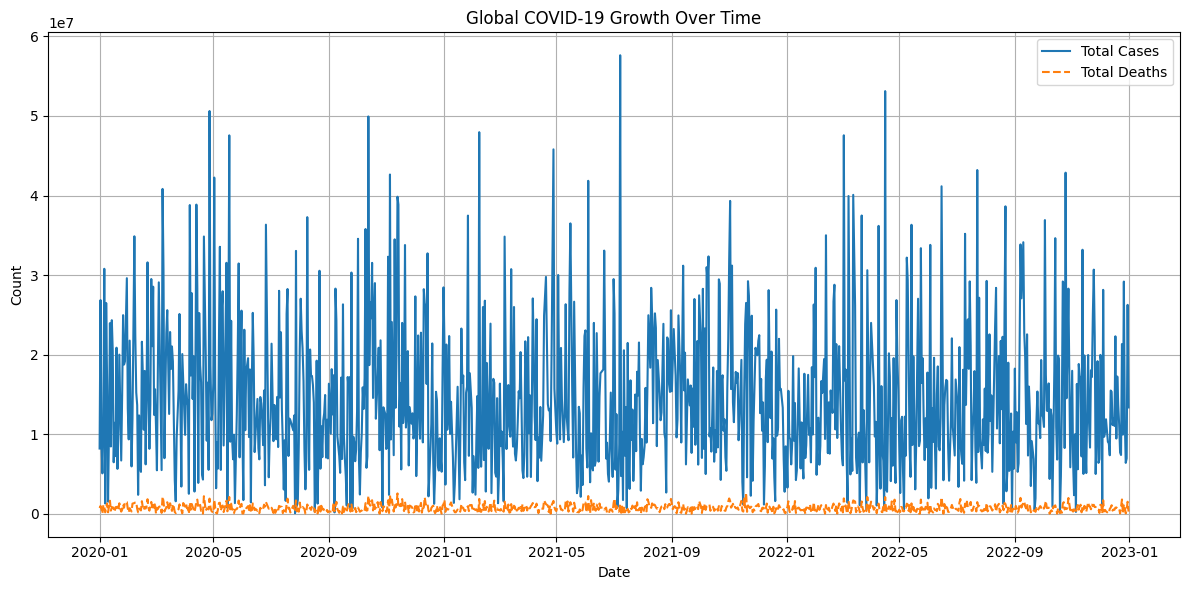

In [5]:
# 4. Group by date to show growth trend globally
global_trend = df.groupby('date')[['total_cases', 'total_deaths']].sum()

plt.figure(figsize=(12,6))
plt.plot(global_trend.index, global_trend['total_cases'], label='Total Cases')
plt.plot(global_trend.index, global_trend['total_deaths'], label='Total Deaths', linestyle='--')
plt.title("Global COVID-19 Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

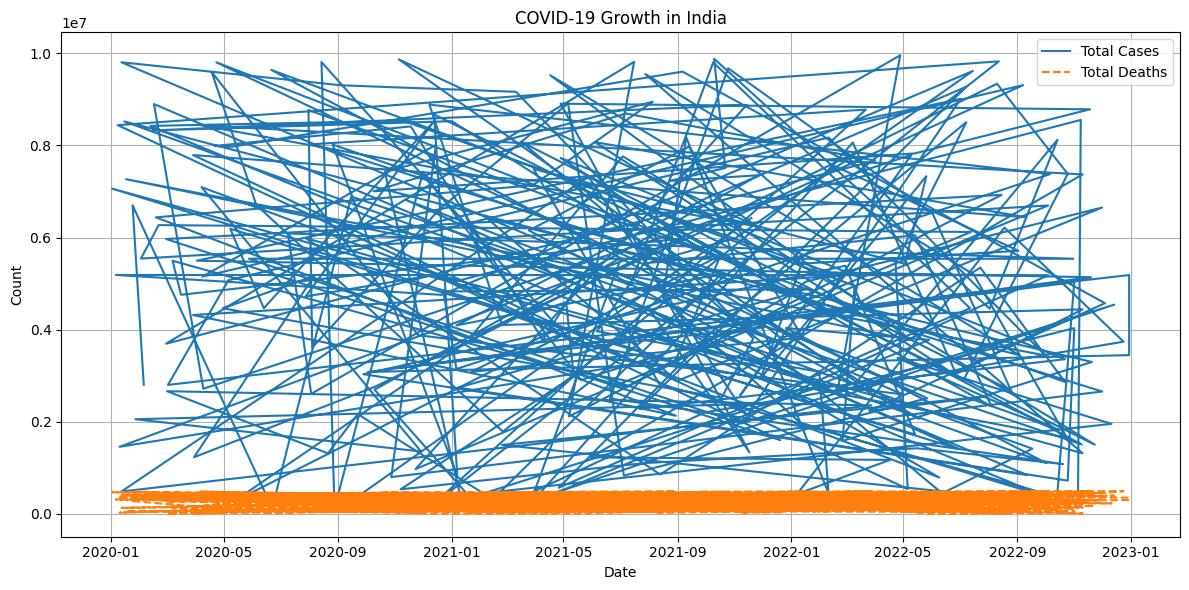

In [3]:
# 5. Line graph for India's case growth
india = df[df['location'] == 'India']

plt.figure(figsize=(12,6))
plt.plot(india['date'], india['total_cases'], label='Total Cases')
plt.plot(india['date'], india['total_deaths'], label='Total Deaths', linestyle='--')
plt.title("COVID-19 Growth in India")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
# 6. Bonus: Calculate death rate
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100
death_rate_summary = df.groupby('location').last()[['death_rate']].sort_values(by='death_rate', ascending=False).head(10)

print("\nTop 10 Countries by Death Rate (%):")
print(death_rate_summary)


Top 10 Countries by Death Rate (%):
          death_rate
location            
USA        29.627658
Italy      18.210857
India      13.001326
Japan       6.064438
Germany     6.024906
UK          5.631822
Russia      5.165966
France      4.905917
Brazil      3.456323
Canada      1.845694
